#### Fine-Tuning Classification Algorithms

When dealing with data that is linearly separable, the goal of
the __Support Vector Machine (SVM)__ learning algorithm is
to find the boundary between classes so that there are fewer
misclassification errors. However, the problem is that there
could be several decision boundaries (B1, B2), as you can see
in the following figure:

Multiple decision boundary

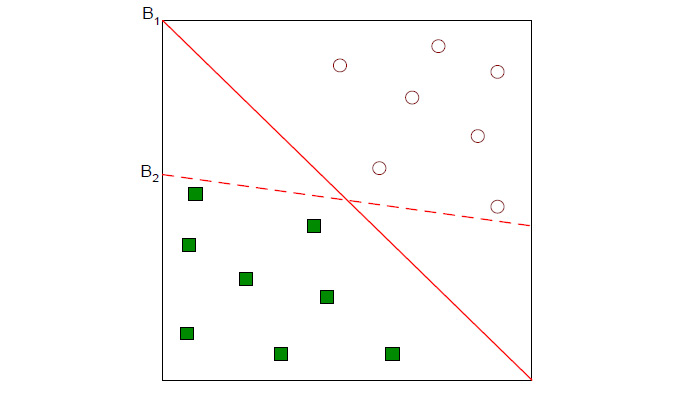

As a result, the question arises as to which of the boundaries
is better, and how to define better. The solution is to use
margin as the optimization objective.

The objective of the SVM algorithm is to maximize the
margin. The margin of a linear classifier is to increase the
width of the boundary before hitting a data point. The
algorithm first finds out the width of the hyperplane and then
maximizes the margin. It chooses the decision boundary that as the maximum margin. So, for instance in the above figure,
it chooses B1:

Note

In geometry, a hyperplane is a subspace whose dimension is
one less than that of its ambient space.

Decision boundary having different width/margin

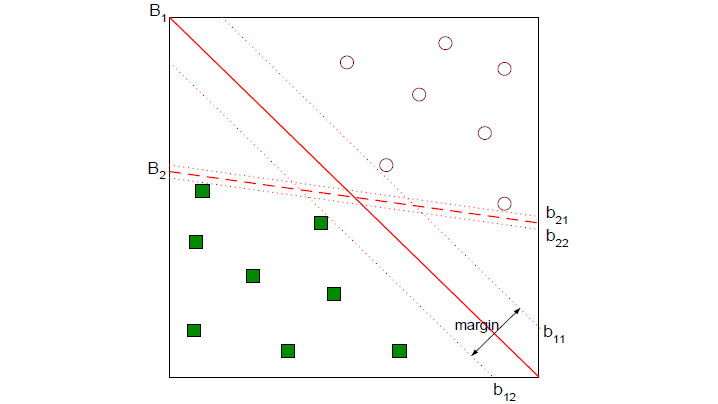

Advantages

* SVMs are effective when dealing with high dimensional data, where the number of dimensions is more than the number of training samples.
* SVMs are known for their use of the kernel function, making it a very versatile algorithm.

Note

Kernel methods owe their name to the use of kernel functions, which enable them to operate in a highdimensional space.

Disadvantages

* SVMs do not calculate probability directly, and instead use a five-fold cross validation to calculate probability
* With high dimensional data, it is important to choose the kernel function and regularization term, which can make the process very slow.

#### Intuition Behind Maximum Margin

Geometrical interpretation of maximum margin

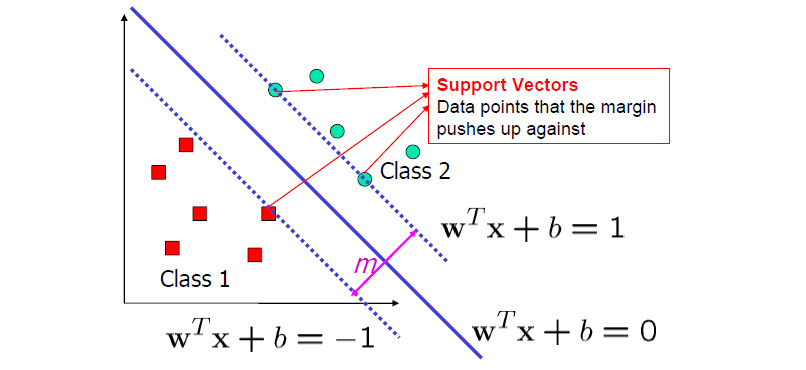

The logic behind having a large margin in the case of an SVM
is that they have a lower generalization error as compared to
small margins, which can result in overfitted data.

Let's consider the positive and negative hyperplane as follows:

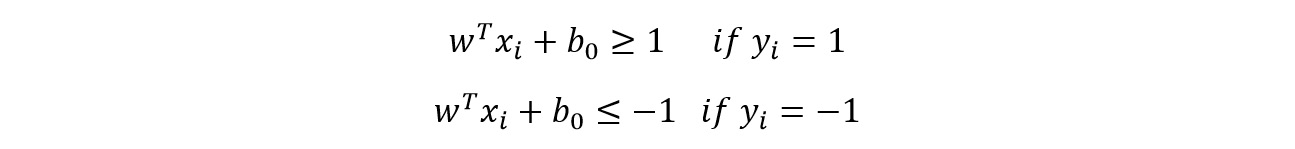

Subtracting the above two equations, we get the following:

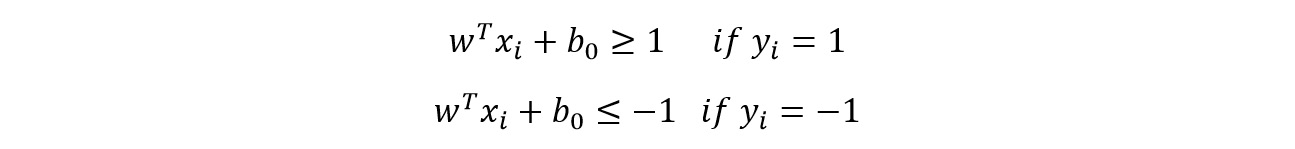

Normalizing the equation by the vector w, we get the
following:

Normalized equation

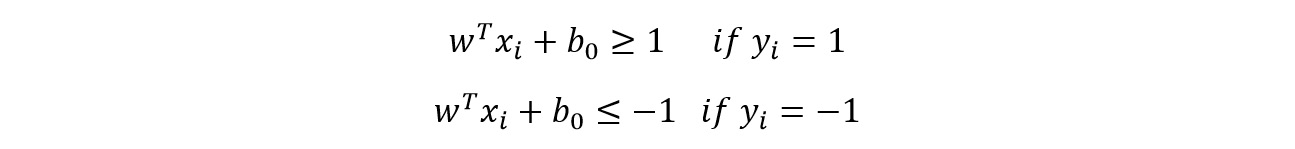

We reduce the preceding equation as follows:

Equation for margin m

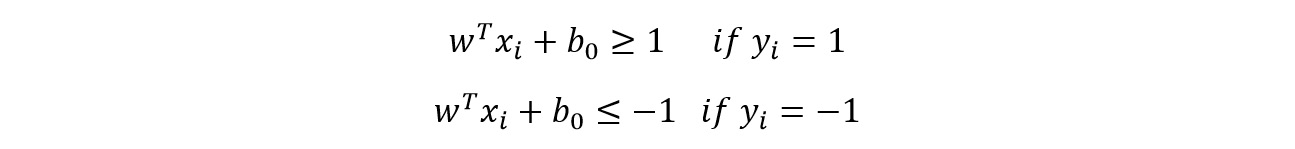

Now, the objective function is obtained by maximizing the
margin within the constraint that the decision boundary
should classify all the points correctly.

Equation for separating the data points on a hyperplane

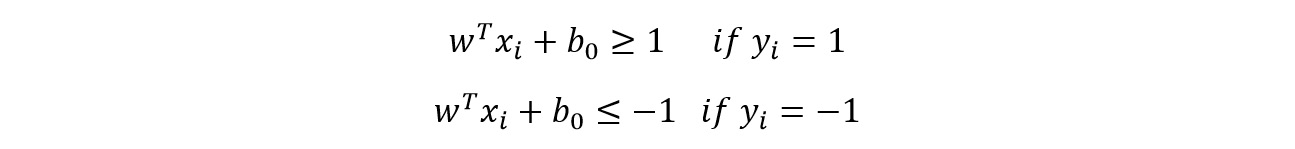


#### Linearly Inseparable Cases

With linearly inseparable cases, such as that illustrated in the
following figure, we cannot use a hard margin
classifier. The
solution is to introduce a new kind of classifier, known as a
soft margin
classifier, using the slack variable ξ.

Linearly inseparable data pints

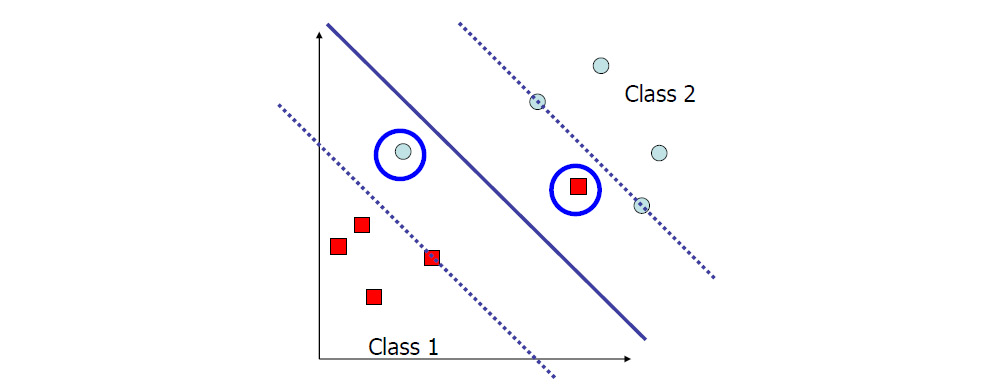

Note

Hard margin refers to the fitting of a model with zero errors;
hence we cannot use a hard margin
classifier for the
preceding figure. A soft margin, on the other hand, allows
the fitting of a model with some error, as highlighted by the
points circled in blue in the preceding figure.

A soft margin SVM works by:

1. Introducing the slack variable
2. Relaxing the constraints
3. Penalizing the relaxation

Using slack variable ξ for linearly inseparable data

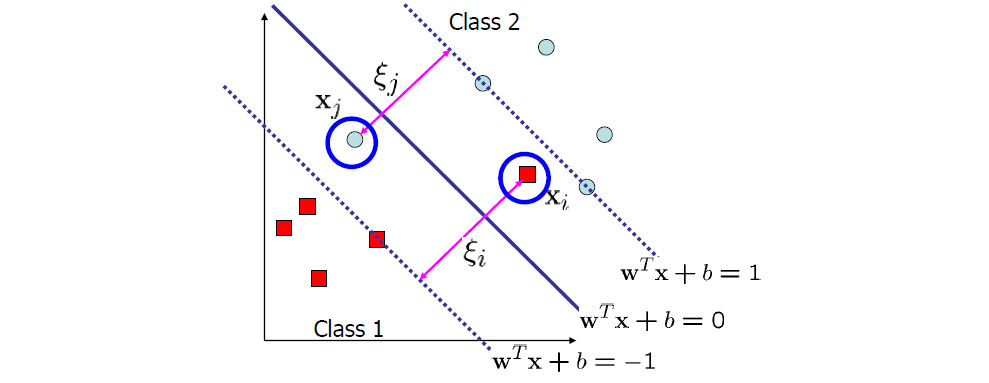

The linear constraints can be changed by adding the slack
variable to our equation

Linear constraints for maximizing margin with slack variable ξ

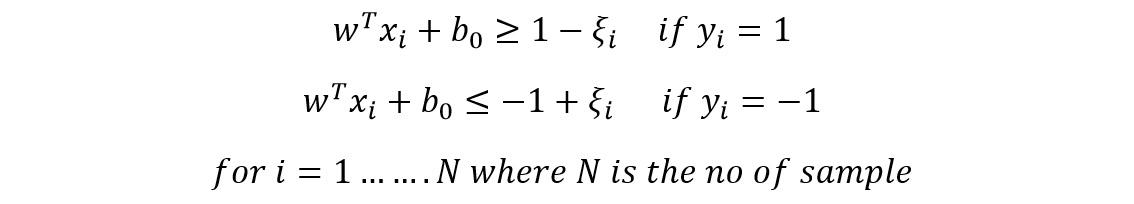

The objective function for linearly inseparable data points
is obtained by minimizing the following:

Objective function to be minimized

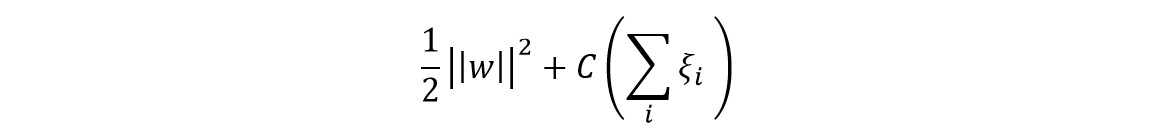

Here C is the penalty cost parameter (regularization).

#### Linearly Inseparable Cases Using Kernel

it would be impossible to have a decision boundary using the slack variable and a linear hyperplane:

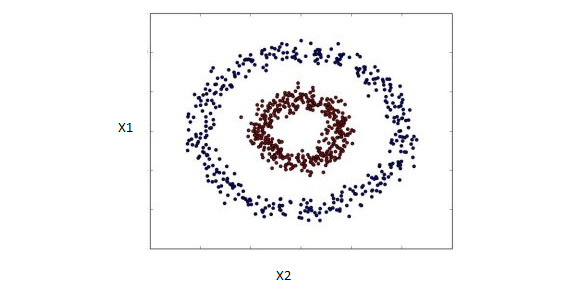

In this scenario, we can use the concept of a kernel, which creates a non-linear combination of original features (x1, x2) to project to a higher dimensional space via a mapping function, φ, to make it linearly separable:

Geometric interpretation and equation for projection from low to
high dimension

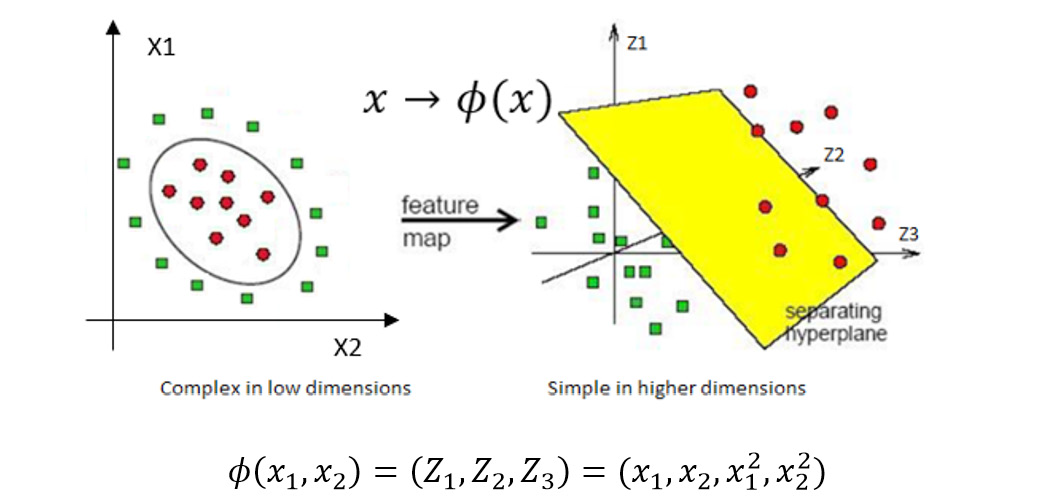

The problem with this explicit feature mapping is that the
dimensionality of the feature can be very high, which makes it
hard to represent it explicitly in memory. This is mitigated
using the kerneltrick. _Kernel-trick_ basically replaces the dot
product xiT xj with a kernel $φ(x_i)^Tφ(x_j)$, which can be defined
as follows:

Kernel function

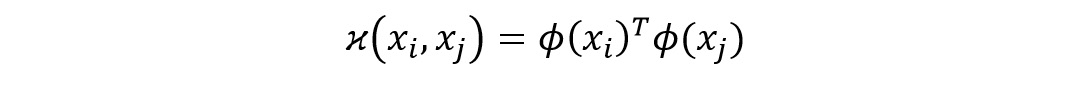

There are different types of kernel functions, namely:

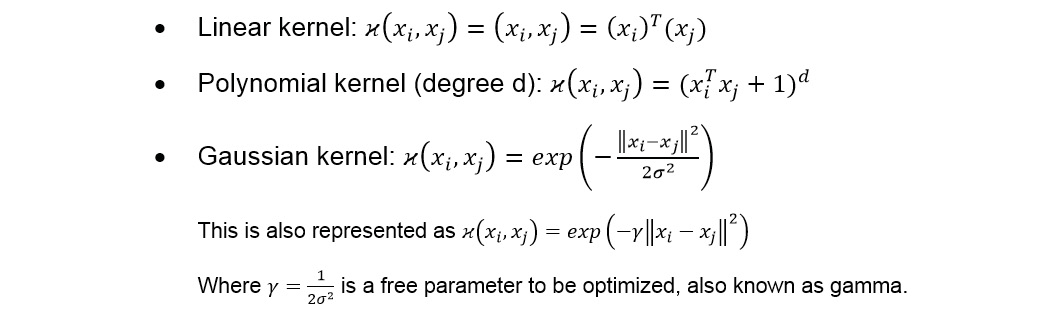

A kernel can also be interpreted as a similarity function and
lies between 0 (an exactly dissimilar sample) and 1 (an exactly
similar sample).

In scikitlearn, the following kernel functions are available:

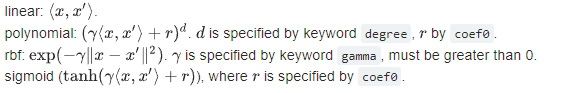

### SVM algorithm over a dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
titanic_data = pd.read_csv(r"data_science/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#### Checking for missing values

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data["Sex"] = titanic_data["Sex"].astype('category').cat.codes
titanic_data["Embarked"] = titanic_data["Embarked"].astype('category').cat.codes

In [6]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked          int8
dtype: object

Replace the missing values in the Age column
with the mean and those in Cabin column with 0 if no
value is present and with 1 if some value is present.

In [7]:
#### Missing value imputation

mean_value = titanic_data['Age'].mean()
titanic_data['Age'] = titanic_data['Age'].fillna(mean_value)

titanic_data[['Cabin']] = np.where(titanic_data[['Cabin']].isnull(), 0, 1)

In [8]:
target = 'Survived'
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket'], axis=1)
y = titanic_data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.50, random_state=123, stratify=y)

In [9]:
clf_svm = svm.SVC(kernel='linear', C=1)
clf_svm.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
clf_svm.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [11]:
clf_svm.score(X_test, y_test)

0.7668161434977578

For the Titanic dataset, the SVM classifier will score an
accuracy of around 76.6%. This implies it can predict
76.6% of the test data accurately.

#### Decision Trees

Decision trees are mostly used for classification tasks. They
are a nonparametric
form of supervised learning method.
Decision trees work on the concept of finding out the target
variable by learning simple decision rules from data. They can
be used for both classification and regression tasks.

Advantages

* Decision trees are very simple to understand and can be visualized.
* They can handle both numeric and categorical data.
* The requirement for data cleaning in the case of decision trees is very low since it is able to handle missing data.
* It's a nonparametric machine learning algorithm that makes no assumption of space distribution and classifier structures.
* It's a white box model rather than a black box model like neural networks, and is able to explain the logic of split using Boolean values.

Disadvantages

* Decision trees tend to overfit data very easily, and pruning is required to prevent overfitting of the model.
* They are not suitable for imbalanced data, where we may have a decision tree that is biased. A decision tree would try to split the node based on the majority class and therefore doesn't generalize very well. The remedy is to balance your data before applying decision trees.

#### Decision tree algorithm over a dataset

In [12]:
import graphviz
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\salam\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [13]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

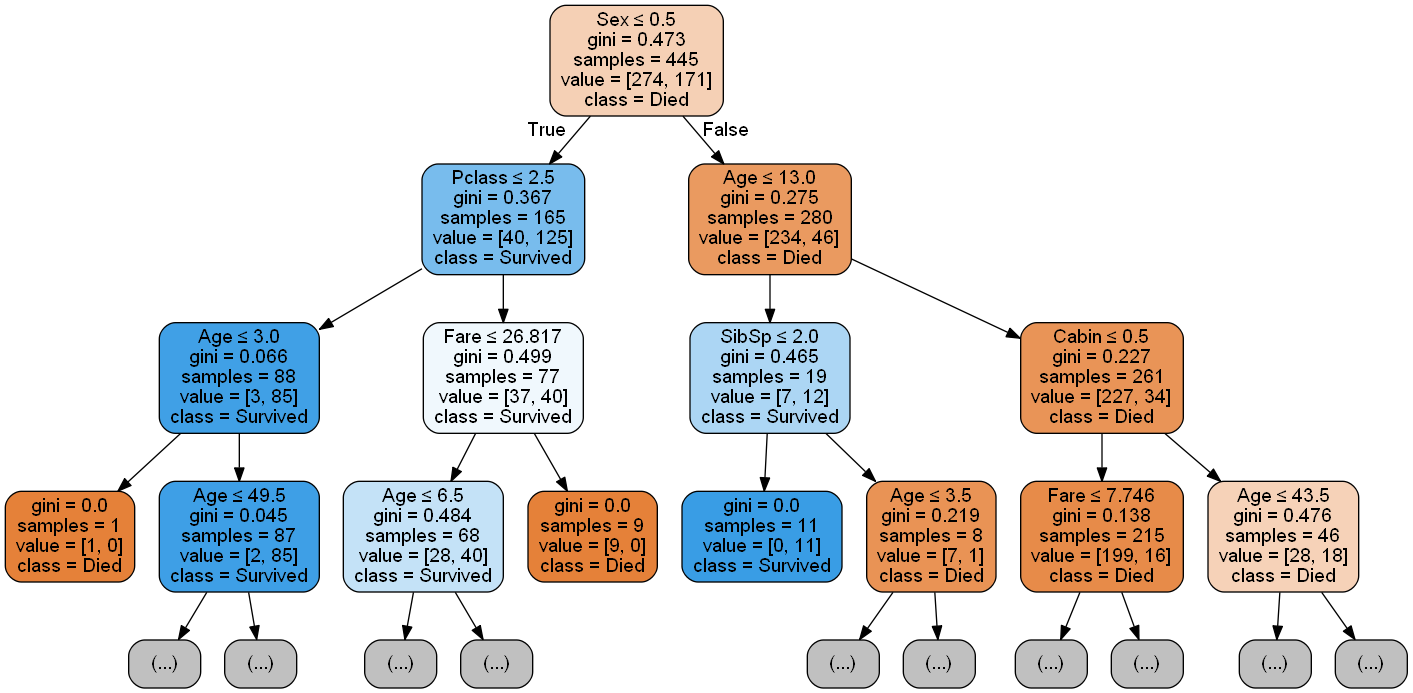

In [14]:
#### The target variable will be the class_names, that is Died or Survived.

dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Died','Survived'], max_depth = 3,
                special_characters=True, feature_names=X.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
clf_tree.score(X_test, y_test)

0.7757847533632287

You should get an output of 0.775, which implies that our
decision tree classifier scores an accuracy of around
77.5%. Hence our classifier is able to predict 77.5% of the
test data correctly.

#### Important terminology of decision trees

A decision tree is read from the top down starting at the __root node__. The terminal nodes of the tree are called __leaves__. The leaves represent the predicted target.

#### Decision tree algorithm formulation

Decision trees use multiple algorithms to split at the root node or subnode. A decision tree goes through all of the features and picks the feature on which it can get the most homogeneous subnodes. For classification tasks, it decides
the most homogeneous subnodes based on the information gained. This information can be calculated using either of these three algorithms:

* Gini Impurity
* Entropy
* Misclassification rate

Each of the nodes in a decision tree represents a feature, each of the branches represent a decision rule, and each of the leaves represent an outcome.

#### Information Gain

It gives details on how much "information" a feature will hold
about the class. Features that are perfectly separable or
partitioned will give us maximum information, while features
that are not perfectly separable or partitioned will give us less
information:

Information gain formula

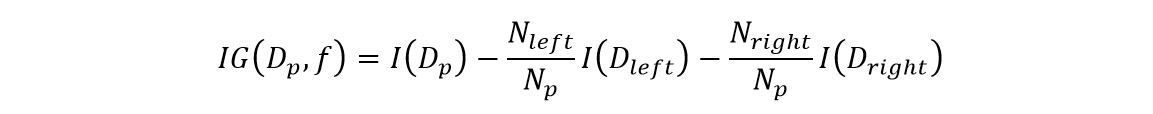

IG=Information gain, I=Impurity, f=Feature,
Dp=Parent dataset, Dleft=Left child dataset, Dright=Right
child dataset, Np=Total number of samples in the parent
dataset, Nleft=Number of samples in the left child dataset,
and Nright=Number of samples in the right child dataset.

The impurity can be calculated using either of the following
three criteria:


#### Gini Impurity

The Gini index can be defined as the criteria that would
minimize the probability of misclassification.

Gini impurity

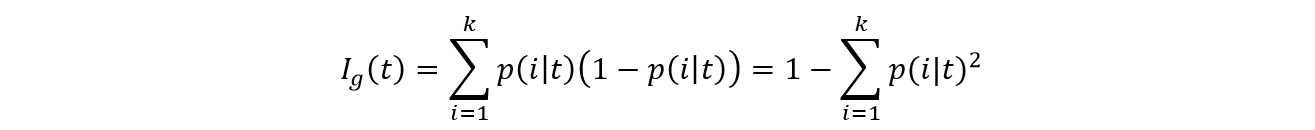

Where, k=number of classes and p(i│t)=proportion of
samples that belong to class k for a particular node t.

For a two class problem, we can simplify the preceding equation as:

Simplified Gini impurity formula for binary classification

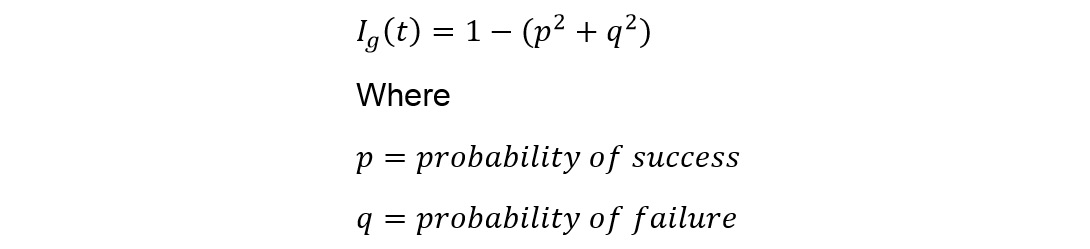

#### Entropy

Entropy can be defined as the criteria that maximizes mutual
information.

Entropy formula

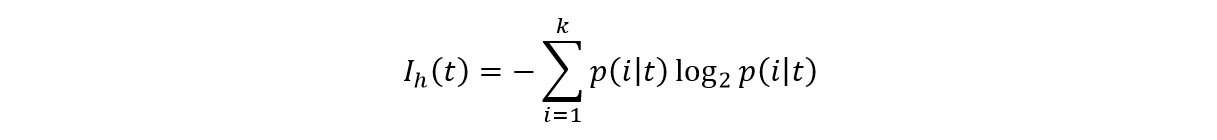

p(i│t)=proportion of samples that belong to class k for a
particular node t. The entropy is 0 if all the samples belong to
the same class, where as it is maximum if we have uniform
class distribution.

For a two class problem, we can simplify the preceding
equation as:

Simplified equation

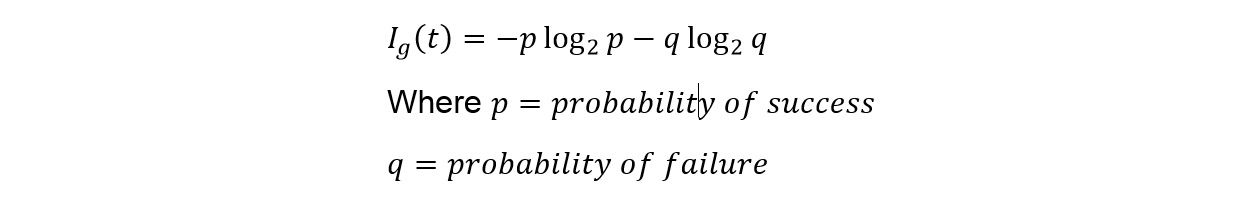

#### Misclassification error

This measures the misclassification error which can be defined as:

Misclassification formula

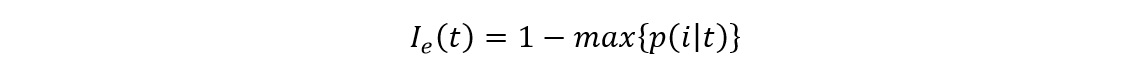

Gini impurity and entropy typically give the same results, and
either one of them can be used to calculate the impurity. To
prune the tree, we can use the misclassification error.

Example: 

Referring to the Titanic dataset, we want to divide
the node to find out whether a person survived or died based
on features such as Sex and Embarked.

Visual representation of tree split

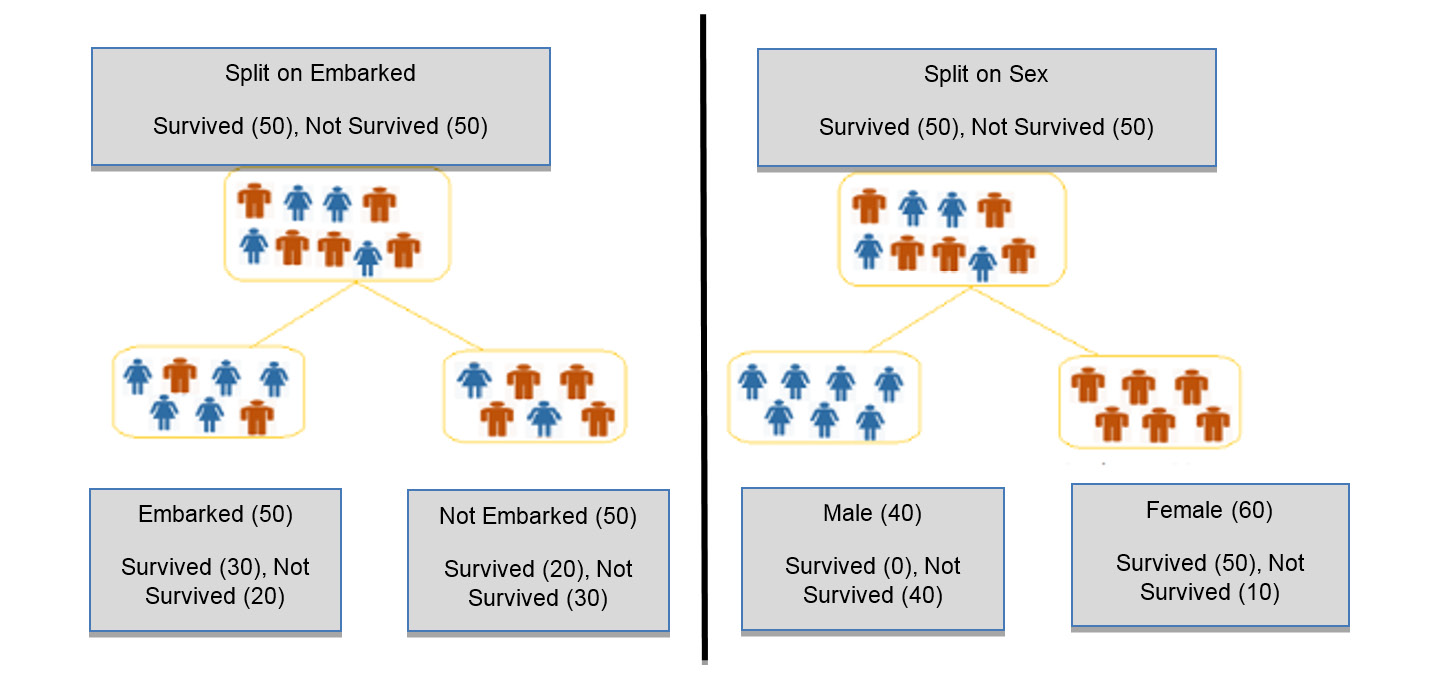

Gini index impurity for embarked:

Information gain calculated using Gini impurity (Embarked)

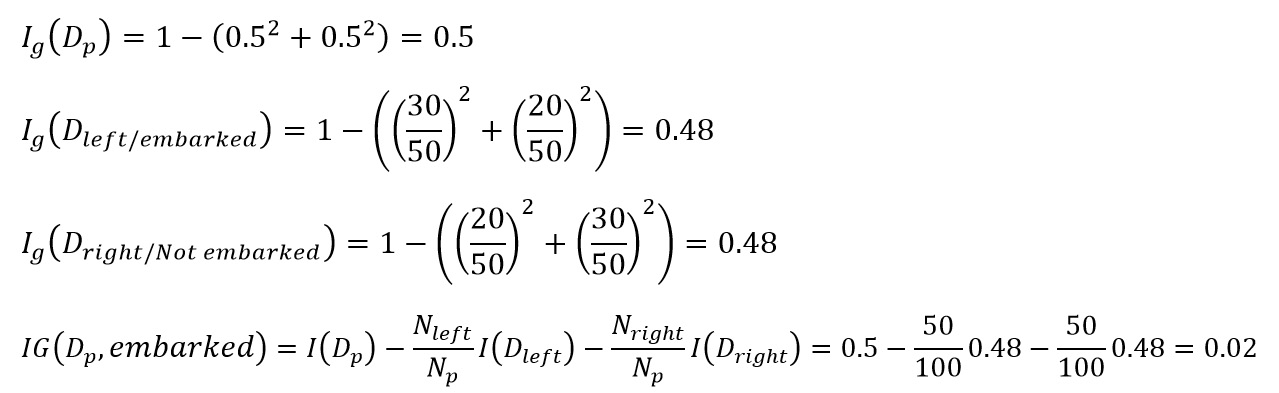

Gini index impurity for gender:

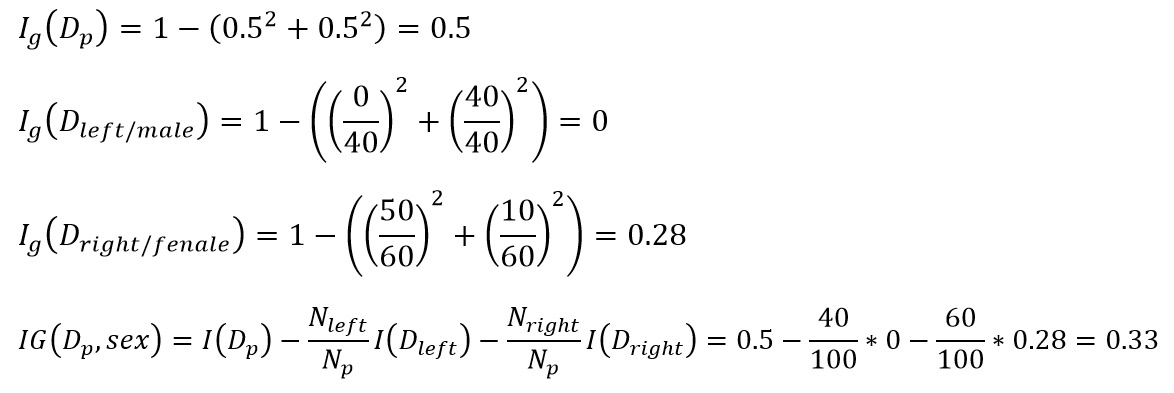

From the information gain calculated, the decision tree will
split based on the gender/sex feature, which is 0.33.

Note

Similarly, information gain can be calculated using entropy and misclassification. 

#### Random Forest

The decision tree algorithm that we saw earlier faced the problem of overfitting. Since we fit only one tree on the training data, there is a high chance that the tree will overfit the data without proper pruning. The random forest algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random forest is an ensemble method of supervised machine learning. Ensemble methods combine predictions obtained from multiple base estimators/classifiers to improve the overall prediction/robustness. Ensemble methods are divided
into the following two types:
* Bagging: The data is randomly divided into several subsets and the model is trained over each of these subsets. Several estimators are built independently from each other and then the predictions are averaged together, which ultimately helps to reduce variance (overfitting).
* Boosting: In the case of boosting, base estimators are built sequentially and each model built is very weak. The objective therefore is to build models in sequence, where the latter models try to reduce the error from the previous model and thereby reduce bias (underfitting).

The random forest algorithm works as follows:
1. A random bootstrap sample (a sample drawn with replacement) of size n is chosen from the training data.
2. Decision trees are grown on each instance of the bootstrap.
3. d features are chosen randomly without replacement.
4. Each node is split using the d features selected based on objective functions, which could be information gain.
5. Steps 1-4 are repeated k times.
6. Each of the predictions by multiple trees are aggregated and assigned a class label by majority vote.

Working of a random forest model

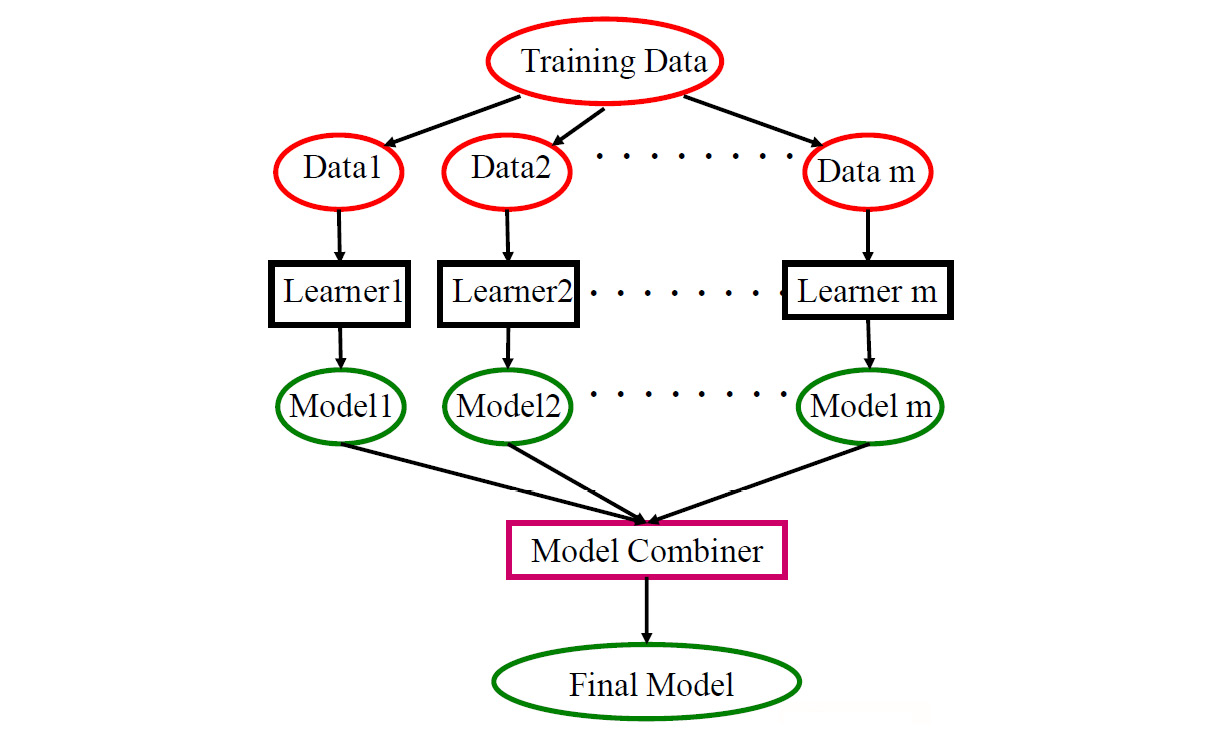

Advantages

* It does not suffer from overfitting, since we take the average of all the predictions
* It can be used to get feature importance
* It can be used for both regression and classification tasks
* It can be used for highly imbalanced datasets
* It is able to handle missing data

Disadvantages

* It suffers from bias, although it reduces variance
* It's mostly a black box model and is difficult to explain

#### Implementing a random forest model over a dataset on Titanic dataset

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier(n_estimators=20, max_depth=None, 
                             min_samples_split=7, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
clf.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [19]:
clf.score(X_test, y_test)

0.7914798206278026

#### Preprocessing Data for Machine Learning Models

Preprocessing data before applying any machine learning
model can improve the accuracy of the model to a large
extent. Therefore, it is important to preprocess data before
applying a machine learning algorithm. Preprocessing data
consists of the following methods: Standardization, Scaling,
and Normalization

#### Standardization

Most machine learning algorithms assume that all features
are centered at zero and have variance in the same order. In
the case of linear models such as logistic and linear
regression, some of the parameters used in the objective
function assume that all the features are centered around zero
and have unit variance. If the values of a feature are much
higher than some of the other features, then that feature
might dominate the objective function and the estimator may
not be able to learn from other features. In such cases,
standardization can be used to rescale features such that they
have a mean of 0 and variance of 1. The following formula is
used for standardization.

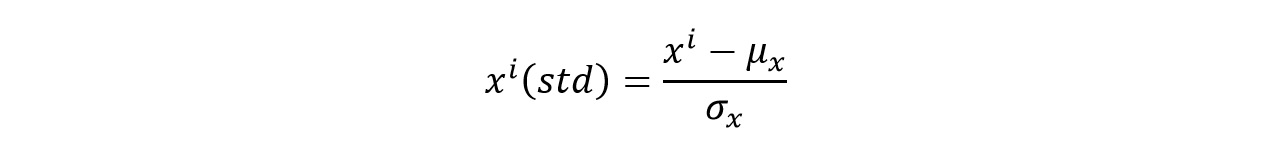

Here, xi is the input data, μx is the mean, and σx is the
standard deviation. Standardization is most useful for
optimization algorithms such as gradient descent. The scikitlearn
API has the StandardScalar utility class.

Check marketing_analytics_5 for exercise - Standardizing data

#### Scaling

Scaling is another method for preprocessing your data. Scaling your data cause the features to lie between a certain minimum and maximum value, mostly between zero and one. As a result, the maximum absolute value of each feature is scaled. Scaling can be effective for some of the machine learning algorithms that use the Euclidean distance such as the KNN (KNearest Neighbors) or kmeans
clustering:

Equation for scaling data

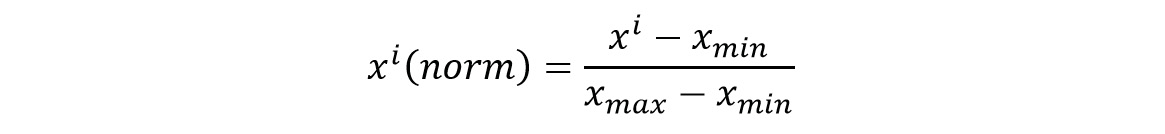

Here, xi is the input data, xmin is the minimum value of the
feature, and xmax is the maximum value of the feature. In
scikitlearn, we use MinMaxScaler or MaxAbsScaler.

Check marketing_analytics_5 for exercise - Scaling data

#### Normalization

In normalization, individual training samples are scaled to
have a unit norm. (The norm of a vector is the size or length of
the vector. Hence, each of the training samples' vector length
will be scaled to 1.) This method is mostly used when we want
to use a quadratic form such as the dotproduct
or any kernel
to quantify sample similarity. It's mostly effective in clustering
and text classification.

We use either the L1 norm or the L2 norm for normalization:

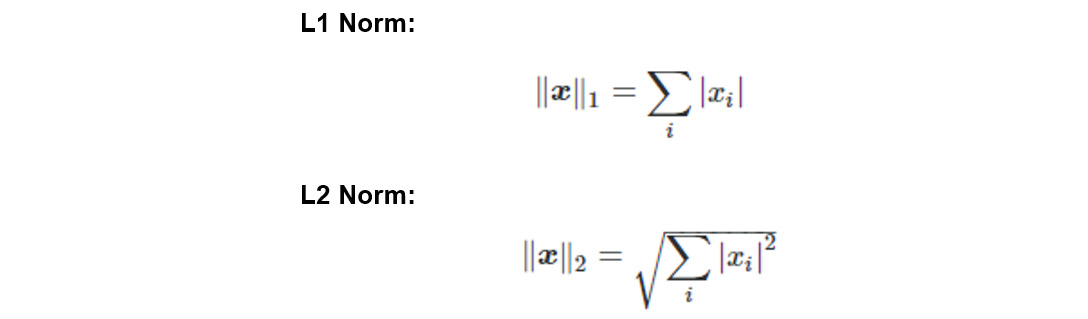

xi is the input training samples.

Note

In scikitlearn, we use the __Normalize__ and __Normalizer__ utility classes. The difference between the two normalizations is out of the scope of this chapter.

Check marketing_analytics_5 for exercise - Normalization

#### Model evaluation

When we train our model, we usually split our data into a
training and testing datasets. This is to ensure that the model
doesn't overfit. Overfitting refers to a phenomena where a
model performs very well on the training data, but fails to give
good results on testing data, or in other words, the model fails
to generalize.

When evaluating our model, we start by changing the parameters to improve the accuracy as per our test data. There is a high chance of leaking some of the information from the testing set to our training set if we optimize our
parameters using only the testing set data. In order to avoid
this, we can split data into three parts—training, testing, and
validation sets. However, the disadvantage of this technique is
that we will be further reducing our training dataset.

The solution is to use __cross-validation__.
In this process, we do not need a separate validation dataset; we split dataset into
training and testing data only. However, the training data is
split into k smaller sets using a technique called k-fold
CV,
which can be explained using the following figure:

k-fold cross validation

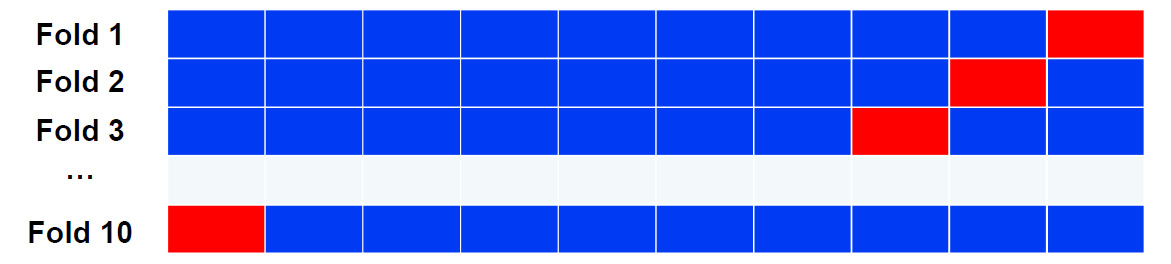

The algorithm is as follows:

1. The entire training data is divided into k fold, in this case it's 10.
2. The model is trained on k-1 portions (blue blocks highlighted in the preceding figure)
3. Once the model is trained, the classifier is evaluated on the remaining 1 portion (red blocks highlighted in the preceding figure).

Steps 2 and 3 are repeated k times.

4. Once the classifier has carried out the evaluation, an overall average score is taken.

This method doesn't work well if we have class imbalance,
and therefore we use a method known as __stratified K fold__.

Note

In many real-world classification problems, classes are not qually distributed. One class may be highly represented,
that is, 90%, while another class may consist of only 10% of
the samples.

We use stratified K-fold to deal with datasets where there is class imbalance. In datasets where there is class imbalance, during splitting, care must be taken to maintain class proportions. In the case of stratified K-fold, it maintains class ratio in each portion.

Check marketing_analytics_5 for exercise - Stratified K-fold

#### Fine-tuning of the model

In the case of a machine learning model, there are two types of parameter tuning that can be performed.

* The first one is the parameters that the model learns from itself, such as the coefficients in case of linear regression or the margin in case of SVM.
* The second one are parameters that must be optimized separately, and are known as hyperparameters, for example, the alpha value in case of lasso linear regression or the number of leaf nodes in case of decision trees. In the case of a machine learning model, there can be a number of hyperparameters and hence it becomes difficult for someone to tune the model by adjusting each of the hyperparameters manually.

There are two methods for performing hyperparameter search
operations in scikitlearn, which are described below:

__Grid search:__ In the case of grid search, it uses brute force exhaustive search to permute all combinations of hyperparameters, which are provided to it as a list of values.

__Randomized Grid Search:__ Randomized grid search is a faster alternative to grid search, which can be very slow due to the use of brute force. In this method, parameters are randomly chosen from a distribution that the user provides. Additionally, the user can provide a sampling iteration
specified by __n_iter__, which is used as a computational budget.

Check marketing_analytics_5 for exercise - Fine-tuning a model

#### Performance Metrics

In the case of classification algorithms, we use a confusion
matrix, which gives us the performance of the learning
algorithm. It is a square matrix that counts the number of true
positive (TP), true negative (TN), false positive (FP), and false
negative (FN) outcomes.